<a href="https://colab.research.google.com/github/Sudarshan-info/PROJECTS/blob/main/titanic_survival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Titanic survival is a famous project in machine learning from disaster.

Step 1 : Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Step 2: Load training dataset from github repository

In [2]:
titanic_data ='https://raw.githubusercontent.com/Sudarshan-info/PROJECTS/refs/heads/datasets/titanic_train.csv'
df = pd.read_csv(titanic_data)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Step 3: EDA , you look into data, understand them, preprocess and filterout unnecessary columns and rows

Removing the redundant features like PassengerId, Name

In [3]:
df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [4]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [5]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2


#Missing values
age has missing values and we replace it by median since it is numerical value
and for embarked we replace the missing values by mode.

In [7]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


Since the data type of age and embraked is object, we change it into numerical data. Although, some algorithms work with categorical values, we encode them here for conveniency.

In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


#Visualization
We visualize the features by plotting various graphs and their correlation

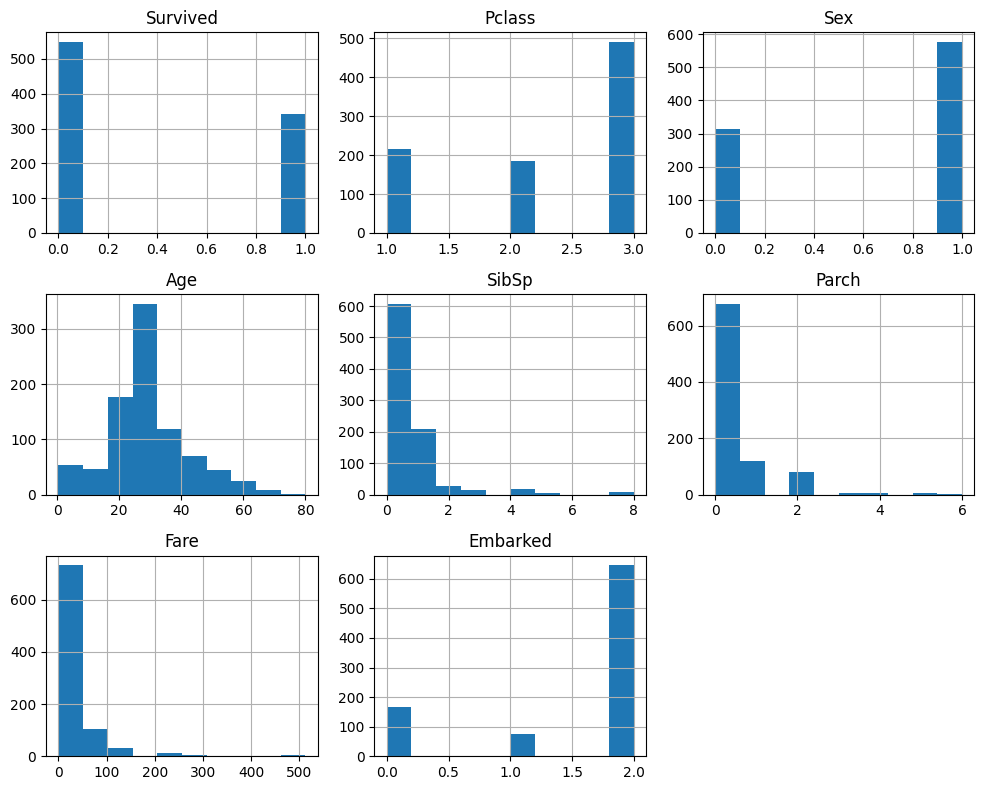

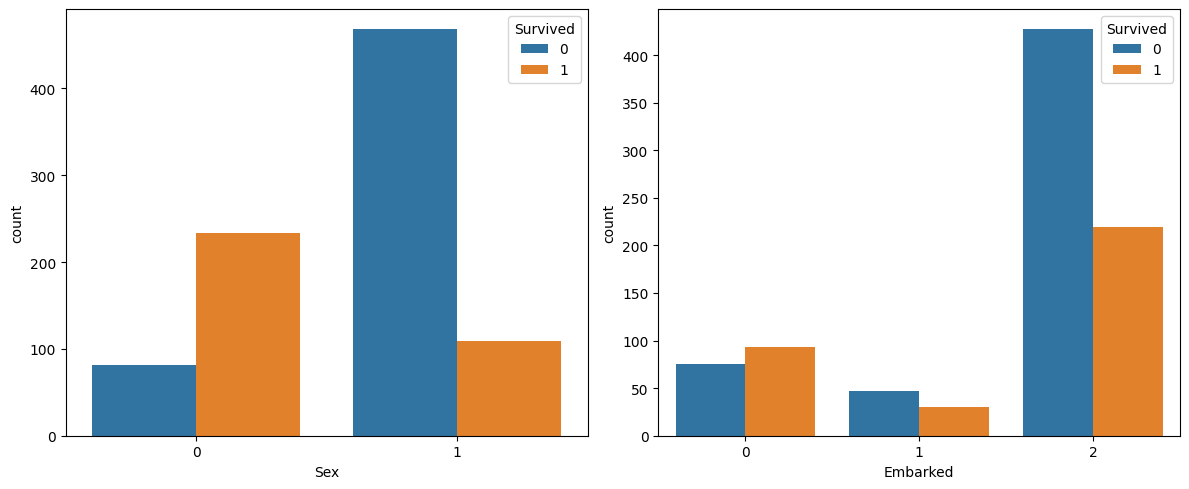

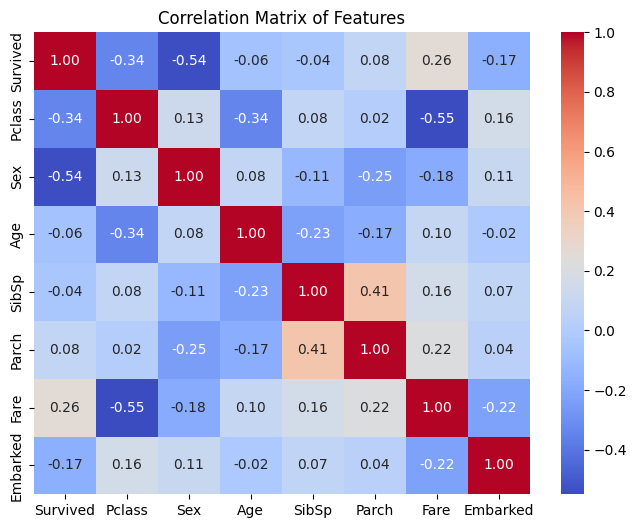

In [10]:
import matplotlib.pyplot as plt
# Histograms for numerical features
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

# Countplots for categorical features
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(x='Sex', hue='Survived', data=df, ax=axes[0])
sns.countplot(x='Embarked', hue='Survived', data=df, ax=axes[1])
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

#Classification Models


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


In [12]:
X = df.drop('Survived',axis=1)
y = df['Survived']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
#Logistic Regression Model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_prediction = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_prediction)
print('Accuracy score: ',accuracy_score(y_test, lr_prediction))
print('Report: ',classification_report(y_test, lr_prediction))

Accuracy score:  0.8100558659217877
Report:                precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [15]:
#Decission Tree Model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_prediction = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_prediction)
print('Accuracy score: ',accuracy_score(y_test, dt_prediction))
print('Report: ',classification_report(y_test, dt_prediction))

Accuracy score:  0.776536312849162
Report:                precision    recall  f1-score   support

           0       0.82      0.79      0.81       105
           1       0.72      0.76      0.74        74

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



In [16]:
#KNN Model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_prediction = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_prediction)
print('Accuracy score: ',accuracy_score(y_test, knn_prediction))
print('Report: ',classification_report(y_test, knn_prediction))

Accuracy score:  0.7039106145251397
Report:                precision    recall  f1-score   support

           0       0.71      0.83      0.77       105
           1       0.68      0.53      0.60        74

    accuracy                           0.70       179
   macro avg       0.70      0.68      0.68       179
weighted avg       0.70      0.70      0.70       179



In [17]:
# prompt: test these three models with new test set

import pandas as pd
# Step 4: Load new test dataset
titanic_test_data = 'https://raw.githubusercontent.com/Sudarshan-info/PROJECTS/refs/heads/datasets/titanic_test.csv'
df_test = pd.read_csv(titanic_test_data)

# Step 5: Preprocess the new test set
# Removing the redundant features like PassengerId, Name
df_test.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

# Handling missing values (similar to the training data)
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].median())
# Handle missing 'Fare' values in the test set
df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].median())
df_test['Embarked'] = df_test['Embarked'].fillna(df_test['Embarked'].mode()[0])

# Encoding categorical features
df_test['Sex'] = le.fit_transform(df_test['Sex'])
df_test['Embarked'] = le.fit_transform(df_test['Embarked'])

# Separate features and target for the test set (although the test set doesn't have 'Survived',
# we need the feature set X_new_test)
X_new_test = df_test

# Step 6: Evaluate the trained models on the new test set
# It is important to note that the test set from the provided URL does not contain the 'Survived' column.
# Therefore, we cannot calculate accuracy or classification reports.
# We can only make predictions on this new test set.

print("\nPredictions on the new test set:")

# Logistic Regression predictions on new test set
lr_new_prediction = lr_model.predict(X_new_test)
print("\nLogistic Regression Predictions:\n", lr_new_prediction)

# Decision Tree predictions on new test set
dt_new_prediction = dt_model.predict(X_new_test)
print("\nDecision Tree Predictions:\n", dt_new_prediction)

# KNN predictions on new test set
knn_new_prediction = knn_model.predict(X_new_test)
print("\nKNN Predictions:\n", knn_new_prediction)

# To actually "test" the models' performance on a new dataset with a known target,
# you would typically need a test dataset that includes the target variable ('Survived').
# Since the provided 'titanic_test.csv' does not have 'Survived', we can only output predictions.
# If you had a test set with 'Survived', you would perform the following:
# Assuming df_test had a 'Survived' column and it was preprocessed similarly:
# y_new_test = df_test['Survived']
# X_new_test = df_test.drop('Survived', axis=1)

# lr_new_accuracy = accuracy_score(y_new_test, lr_new_prediction)
# print('Logistic Regression Accuracy on New Test Set:', lr_new_accuracy)
# print('Logistic Regression Report on New Test Set:\n', classification_report(y_new_test, lr_new_prediction))

# dt_new_accuracy = accuracy_score(y_new_test, dt_new_prediction)
# print('Decision Tree Accuracy on New Test Set:', dt_new_accuracy)
# print('Decision Tree Report on New Test Set:\n', classification_report(y_new_test, dt_new_prediction))

# knn_new_accuracy = accuracy_score(y_new_test, knn_new_prediction)
# print('KNN Accuracy on New Test Set:', knn_new_accuracy)
# print('KNN Report on New Test Set:\n', classification_report(y_new_test, knn_new_prediction))


Predictions on the new test set:

Logistic Regression Predictions:
 [0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]

Decision Tree Predictions:
 [0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 0 1 0 0 1 0 

In [18]:
import pandas as pd
import numpy as np
# Decode predictions (0 for Not Survived, 1 for Survived)
decoded_lr_predictions = np.where(lr_new_prediction == 1, 'Survived', 'Not Survived')
decoded_dt_predictions = np.where(dt_new_prediction == 1, 'Survived', 'Not Survived')
decoded_knn_predictions = np.where(knn_new_prediction == 1, 'Survived', 'Not Survived')

# Create a DataFrame to display predictions in a table
predictions_df = pd.DataFrame({
    'Logistic Regression Prediction': decoded_lr_predictions,
    'Decision Tree Prediction': decoded_dt_predictions,
    'KNN Prediction': decoded_knn_predictions
})

# Display the table
print("\nDecoded Predictions on the new test set:")
print(predictions_df.to_markdown(index=False)) # Using to_markdown for better table display in Colab/Jupyter


Decoded Predictions on the new test set:
| Logistic Regression Prediction   | Decision Tree Prediction   | KNN Prediction   |
|:---------------------------------|:---------------------------|:-----------------|
| Not Survived                     | Not Survived               | Not Survived     |
| Not Survived                     | Survived                   | Not Survived     |
| Not Survived                     | Survived                   | Not Survived     |
| Not Survived                     | Survived                   | Survived         |
| Survived                         | Survived                   | Not Survived     |
| Not Survived                     | Not Survived               | Not Survived     |
| Survived                         | Not Survived               | Not Survived     |
| Not Survived                     | Not Survived               | Survived         |
| Survived                         | Survived                   | Not Survived     |
| Not Survived         

In [19]:
from google.colab import files

# Create a DataFrame to display predictions in a table, including the original test data for context
predictions_output_df = df_test.copy() # Start with the preprocessed test data
predictions_output_df['Logistic Regression Prediction'] = decoded_lr_predictions
predictions_output_df['Decision Tree Prediction'] = decoded_dt_predictions
predictions_output_df['KNN Prediction'] = decoded_knn_predictions

# Display the table
print("\nDecoded Predictions on the new test set:")
print(predictions_output_df.to_markdown(index=True)) # Using to_markdown for better table display

# Save the DataFrame to a CSV file
predictions_output_df.to_csv('titanic_predictions_with_data.csv', index=True)

# Make the file downloadable
files.download('titanic_predictions_with_data.csv')


Decoded Predictions on the new test set:
|     |   Pclass |   Sex |   Age |   SibSp |   Parch |     Fare |   Embarked | Logistic Regression Prediction   | Decision Tree Prediction   | KNN Prediction   |
|----:|---------:|------:|------:|--------:|--------:|---------:|-----------:|:---------------------------------|:---------------------------|:-----------------|
|   0 |        3 |     1 | 34.5  |       0 |       0 |   7.8292 |          1 | Not Survived                     | Not Survived               | Not Survived     |
|   1 |        3 |     0 | 47    |       1 |       0 |   7      |          2 | Not Survived                     | Survived                   | Not Survived     |
|   2 |        2 |     1 | 62    |       0 |       0 |   9.6875 |          1 | Not Survived                     | Survived                   | Not Survived     |
|   3 |        3 |     1 | 27    |       0 |       0 |   8.6625 |          2 | Not Survived                     | Survived                   | Survi

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Hence, the new datasets were tested for the ML algorithms and predictions were made.